# Time-evolution convergence figures

Works with JL3 on ppmstar.org

In [1]:
%pylab ipympl
from astropy import units
from nugridpy import utils as ut
from scipy import interpolate
import sys
import pickle  
sys.path.insert(0,'/home/user/user/niagara_scratch_sblouin/PyPPM')
from ppmpy import ppm  
logging.getLogger("matplotlib").setLevel(logging.ERROR)
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [16]:
runs = ['X14','X22','X24','X26']
path = {'X14':'niagara_scratch_fherwig/X14-1000xL-1000xK-heating-768-mc2400-rin40',
        'X22':'frontera_scratch3_mao1/X22-1000xL-1000xK-heating-1536-mc2400-rin40',
        'X24':'niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod',
        'X26':'frontera_scratch3_mao1/X26-1xL-1xK-1536-mc12400'}
ddir = '/home/user/user/'

In [22]:
rp = {}
rph = {}
for run in runs:
    rprof_dir = ddir+path[run]+'/prfs'
    rp[run] = ppm.RprofSet(rprof_dir)
    rph[run] = rp[run].get_history()

420 rprof files found in '/home/user/user/niagara_scratch_fherwig/X14-1000xL-1000xK-heating-768-mc2400-rin40/prfs/.
Dump numbers range from 0 to 419.
483 rprof files found in '/home/user/user/frontera_scratch3_mao1/X22-1000xL-1000xK-heating-1536-mc2400-rin40/prfs/.
Dump numbers range from 0 to 482.
1291 rprof files found in '/home/user/user/niagara_scratch_fherwig/X24-1xL-1xK-heating-768-mc12400-rin40-P0fix-kappamod/prfs/.
Dump numbers range from 0 to 1290.
516 rprof files found in '/home/user/user/frontera_scratch3_mao1/X26-1xL-1xK-1536-mc12400/prfs/.
Dump numbers range from 0 to 515.


In [45]:
matplotlib.rcParams.update({'font.size': 12})

100%|██████████| 433/433 [00:00<00:00, 945.98it/s] 
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
100%|██████████| 516/516 [00:00<00:00, 847.03it/s] 


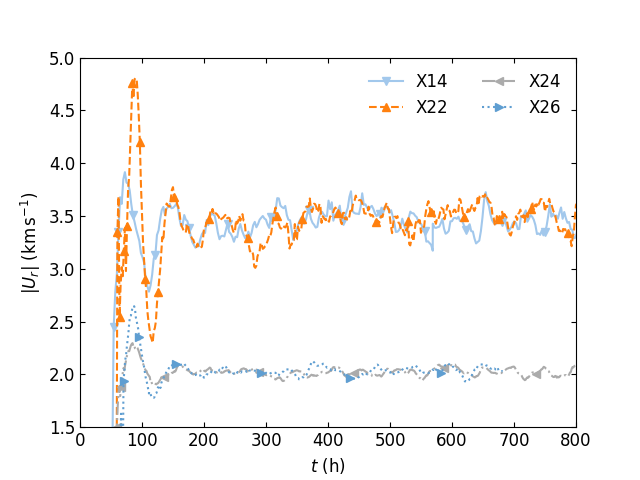

In [64]:
close(1);figure(1)
for i,run in enumerate(runs):
    dumps = rph[run].get('NDump')
    t_v = [0]
    Ur_v = [0]
    for dump in tqdm(dumps):
        Ur = rp[run].get('|Ur|',fname=dump)
        R = rp[run].get('R',fname=dump)
        cp = rp[run].bound_rad(cycles=dump,r_min=200,r_max=800,var='|Ut|',criterion='max_grad')
        Hp = rp[run].compute_Hp(fname=dump)
        Hp_val = interp(cp, R[::-1], Hp[::-1])
        Ur_val = interp(cp+Hp_val/2, R[::-1], Ur[::-1])
        t_min = rph[run].get('time(mins)')
        t_hrs = t_min[dump]/60
        if t_hrs<t_v[-1]:
            continue
        t_v.append(t_hrs)
        Ur_v.append(1000*Ur_val)
    plot(t_v,Ur_v, ut.linestyle(i)[0],color=ut.linestylecb(i)[2],markevery=.2,label=run)
xlim(0,800)
legend(frameon=False,ncol=2,loc=1)
ylim(1.5,5)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
xlabel(r'$t$ (h)')
ylabel(r'$|U_r|$ (km$\,$s$^{-1}$)')
savefig('convergence_above.pdf', bbox_inches='tight')

100%|██████████| 516/516 [00:00<00:00, 787.43it/s]


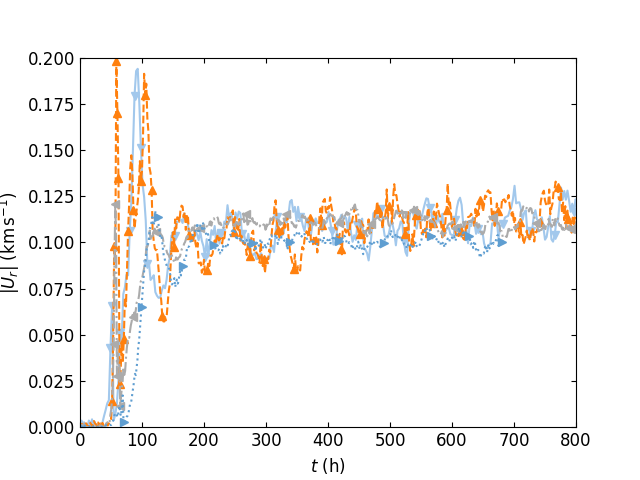

In [63]:
close(2);figure(2)
for i,run in enumerate(runs):
    dumps = rph[run].get('NDump')
    t_v = [0]
    Ur_v = [0]
    for dump in tqdm(dumps):
        Ur = rp[run].get('|Ur|',fname=dump)
        R = rp[run].get('R',fname=dump)
        cp = rp[run].bound_rad(cycles=dump,r_min=200,r_max=800,var='|Ut|',criterion='max_grad')
        Hp = rp[run].compute_Hp(fname=dump)
        Hp_val = interp(cp, R[::-1], Hp[::-1])
        Ur_val = interp(cp-Hp_val/2, R[::-1], Ur[::-1])
        t_min = rph[run].get('time(mins)')
        t_hrs = t_min[dump]/60
        if t_hrs<t_v[-1]:
            continue
        t_v.append(t_hrs)
        Ur_v.append(1000*Ur_val)
    plot(t_v,Ur_v, ut.linestyle(i)[0],color=ut.linestylecb(i)[2],markevery=.2,label=run)
xlim(0,800)
ylim(0,0.2)
#legend(frameon=False,ncol=2,loc=1)
#ylim(1.5,5)
ax = plt.gca()
ax.tick_params(axis='both',direction='in',which='both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
xlabel(r'$t$ (h)')
ylabel(r'$|U_r|$ (km$\,$s$^{-1}$)')
savefig('convergence_below.pdf', bbox_inches='tight')